<a href="https://colab.research.google.com/github/LazaroR-u/Sparks-Foundation-Data-Science/blob/main/TASK2_TSF_UNSUPERVISED_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTION USING UNSUPERVISED MACHINE LEARNING

Author: **Lázaro Raúl Díaz Lievano.**

As part of Data Science and Business Analytics Intern in **The Sparks Foundation**.

## **K-MEANS CLUSTERING**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris, load_wine
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load dataset

In [ ]:
iris = datasets.load_iris()

df_iris = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
    )

iris_target = pd.Series(
    iris.target
    )

df_iris["target"]=iris_target

target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df_iris['target_names'] = df_iris['target'].map(target_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Exploratory Data Analysis

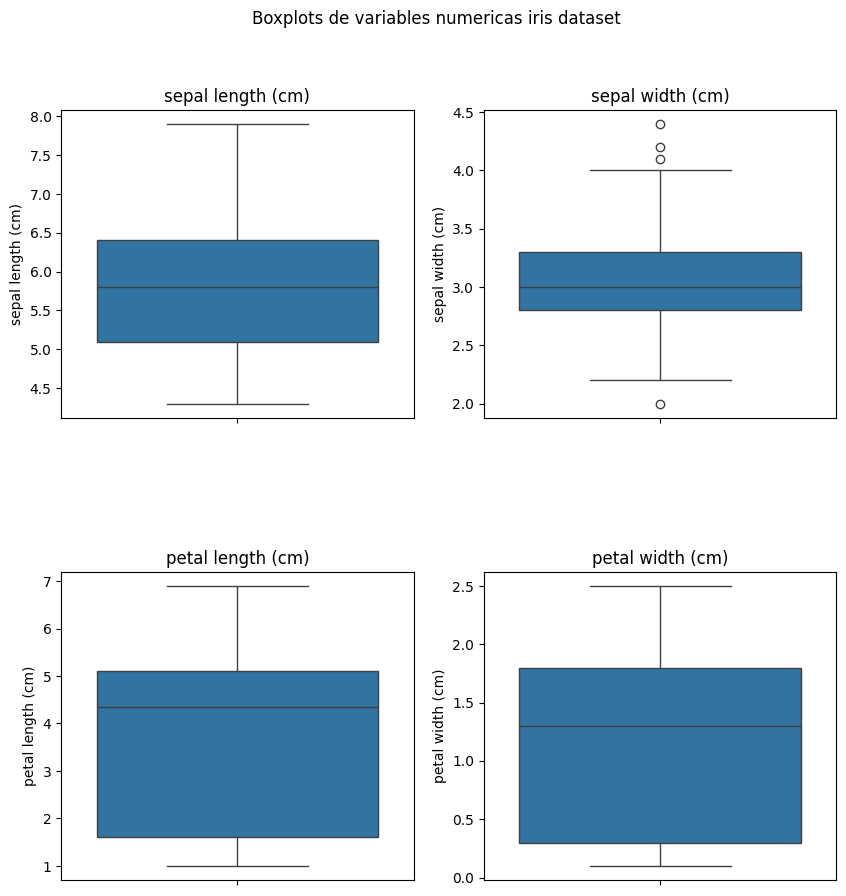

In [ ]:
# Crea una figura con 10 subplots (uno para cada columna)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)  # Ajusta el espacio entre los subplots

# Itera a través de las columnas y crea los boxplots
for i, column in enumerate(df_iris.select_dtypes(include=np.float64).columns
):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df_iris, y=column, ax=axes[row, col])
    axes[row, col].set_title(column)

# Añade un título general a la figura
fig.suptitle('Boxplots de variables numericas iris dataset')

# Muestra la figura
plt.show()

<ipython-input-16-29c251a7d6f3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5)


<Axes: >

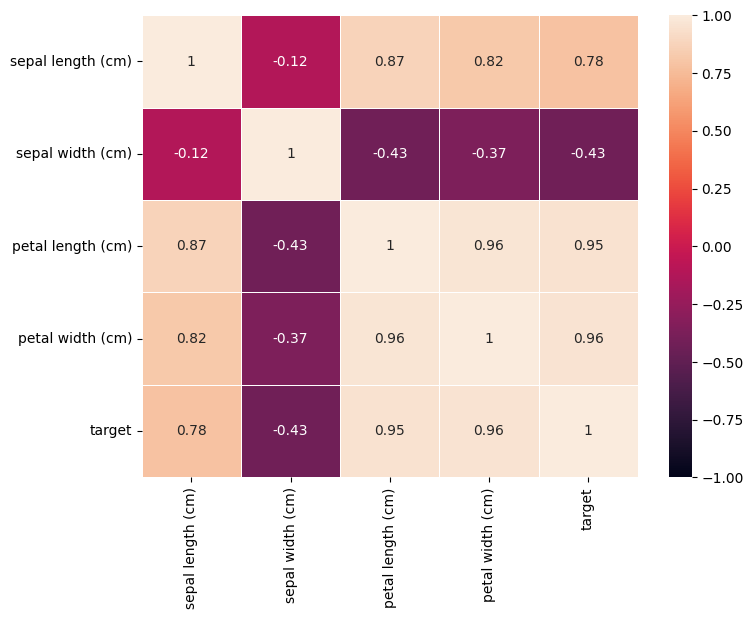

In [ ]:
plt.figure(figsize= (8,6))
sns.heatmap(df_iris.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5)

## Elbow Method

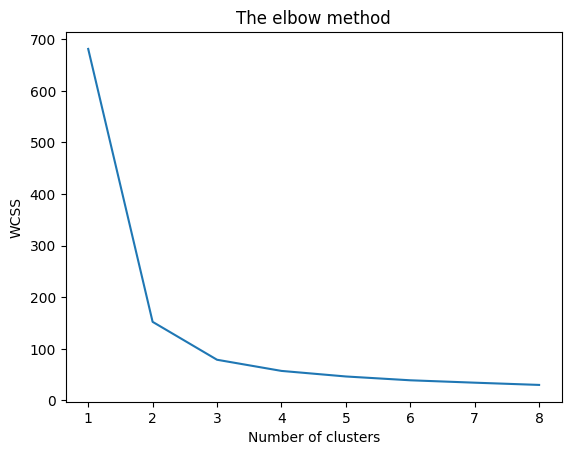

In [29]:
x = df_iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 500, n_init = 15, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 9), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## K-Means Clustering

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualization

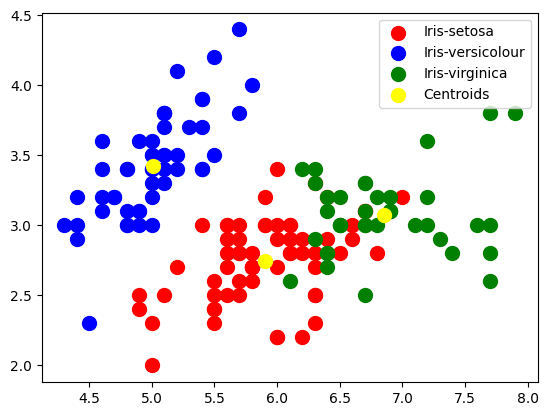

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()